In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
import torch
from glob import glob

In [55]:
folders_composite=glob("Composite Images/*/")
folders_composite

['Composite Images\\20190508-C2GNT1-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT

In [56]:
labels=pd.read_csv('labels.csv',index_col=0)
labels

,label
0,20190508-C2GNT1-EGFP-Noc-01
1,20190508-C2GNT1-EGFP-Noc-02
2,20190508-C2GNT1-EGFP-Noc-03
3,20190508-C2GNT1-EGFP-Noc-04
4,20190508-C2GNT1-EGFP-Noc-05
5,20190508-GALNT4-EGFP-Noc-01
6,20190508-GALNT4-EGFP-Noc-02
7,20190508-GALNT4-EGFP-Noc-03
8,20190508-GALNT4-EGFP-Noc-04
9,20190508-GALNT4-EGFP-Noc-05


In [57]:
test_label=list(labels.iloc[32:38]['label'])
test_label

['20190823-EGFP-Golph3-Noc-05',
 '20190823-EGFP-Golph3-Noc-06',
 '20190823-EGFP-Golph3-Noc-07',
 '20190823-EGFP-Golph3-Noc-08',
 '20190823-EGFP-Golph3-Noc-09',
 '20190823-EGFP-Golph3-Noc-10']

In [58]:
test_label_ind=list(labels.iloc[32:38].index)
test_label_ind

[32, 33, 34, 35, 36, 37]

In [59]:
val_label=list(labels.iloc[20:26]['label'])
val_label

['20190508-VIP36-EGFP-Noc-01',
 '20190508-VIP36-EGFP-Noc-02',
 '20190508-VIP36-EGFP-Noc-03',
 '20190508-VIP36-EGFP-Noc-04',
 '20190508-VIP36-EGFP-Noc-05',
 '20190508-VIP36-EGFP-Noc-06']

In [60]:
val_label_ind=list(labels.iloc[20:26].index)
val_label_ind

[20, 21, 22, 23, 24, 25]

In [61]:
train_label_ind=labels[~labels['label'].isin(test_label)]
train_label_ind=list(train_label_ind[~train_label_ind['label'].isin(val_label)].index)
train_label_ind.remove(18)
train_label_ind.remove(19)
train_label_ind.remove(38)
train_label_ind.remove(39)
train_label_ind

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 26,
 27,
 28,
 29,
 30,
 31]

In [62]:
def Transform(img):
    test=np.swapaxes(img,0,2)
    test=np.swapaxes(test,1,2)
    return np.array(test,dtype='f')

In [63]:
def GetObject(img,top,bottom,left,right):
    roi=img[top:bottom+1,left:right+1]
    return cv2.resize(roi, dsize=(17, 17), interpolation=cv2.INTER_CUBIC)

In [64]:
x_train=[]
y_train=[]

for i in train_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_train.append(obj_tensor)
        y_train.append(1)


In [65]:
torch.tensor(x_train).shape

torch.Size([966, 3, 17, 17])

In [66]:

for i in train_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_train.append(obj_tensor)
        y_train.append(0)



In [67]:
np.unique(np.array(y_train), return_counts=True)

(array([0, 1]), array([1136,  966], dtype=int64))

In [68]:
torch.tensor(x_train).shape

torch.Size([2102, 3, 17, 17])

In [16]:
x_test=[]
y_test=[]

for i in test_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_test.append(obj_tensor)
        y_test.append(1)
    
    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_test.append(obj_tensor)
        y_test.append(0)

In [17]:
torch.tensor(x_test).shape

torch.Size([376, 3, 17, 17])

In [18]:
x_val=[]
y_val=[]

for i in val_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_val.append(obj_tensor)
        y_val.append(1)
    
    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_val.append(obj_tensor)
        y_val.append(0)

In [19]:
torch.tensor(x_val).shape

torch.Size([480, 3, 17, 17])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
def PrepareTrainData(x,y):
    traindata=[]
    for i in range(0,len(x)):
        traindata.append([x[i],y[i]])
    return traindata

In [22]:
X=x_train
y=y_train

In [23]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [24]:
y_val.count(0)

228

In [25]:
y_val.count(1)

193

In [26]:
y_train.count(0)

908

In [27]:
y_train.count(1)

773

In [28]:
import torch.utils.data as Data

In [29]:
train_data=PrepareTrainData(x_train,y_train)
val_data=PrepareTrainData(x_val,y_val)

In [30]:
train_loader = Data.DataLoader(
    dataset=train_data,      # torch TensorDataset format
    batch_size=40,      # ����������
    shuffle=True,               # �Ƿ������������
    num_workers=2,              # ���ڼ������ݵ��ӽ���
)

val_loader = Data.DataLoader(
    dataset=val_data,      # torch TensorDataset format
    batch_size=40,      # ����������
    shuffle=True,               # �Ƿ������������
    num_workers=2,              # ���ڼ������ݵ��ӽ���
)

In [31]:
cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 512, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

In [32]:
torch.tensor(x_train).shape

torch.Size([1681, 3, 17, 17])

In [33]:
cnn_layers(torch.tensor(x_train)[0:1]).shape

torch.Size([1, 512, 2, 2])

In [34]:
class Model_VGG_v2(torch.nn.Module):
    def __init__(self):
        super(Model_VGG_v2, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 512, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(2048, 512),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 128),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(128,2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [35]:
def Train_v2(epoch,learning_rate,version):

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_func = torch.nn.CrossEntropyLoss()
    epochs=epoch

    epoch_list=[]
    train_loss_list=[]
    val_loss_list=[]
    train_acc_0_list=[]
    val_acc_0_list=[]
    train_acc_1_list=[]
    val_acc_1_list=[]

    best_loss=0

    for e in range(epochs):

        train_loss = 0.0

       # train_total_0 = 0
        #val_total_0 = 0
        
        #train_correct_0 = 0
        #val_correct_0 = 0

        train_total_pred_1 = 0
        train_total_true_1 = 0
        val_total_pred_1 = 0
        val_total_true_1 = 0
        
        train_correct_1 = 0
        val_correct_1 = 0

        for data, labels in train_loader:
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
            
            optimizer.zero_grad()
            target = model(data)
            loss = loss_func(target,labels.long())
            loss.backward()
            optimizer.step()
            train_loss = loss.item() * data.size(0)

            scores, predictions = torch.max(target.data, 1)

            #train_total_0 += int(sum(labels == 0))
            #train_correct_0 += int(sum(p==l and l==0 for p,l in zip(predictions,labels)))
            #train_prec_0 = round(train_correct_0 / train_total_0, 3)

            train_total_pred_1 += int(sum(predictions == 1))
            train_total_true_1 += int(sum(labels==1))
            train_correct_1 += int(sum(p==l and l==1 for p,l in zip(predictions,labels)))
        
        try:
            train_prec_1 = round(train_correct_1 / train_total_pred_1, 3)
            train_recall_1 = round(train_correct_1/train_total_true_1, 3)
            train_F1_1 = 2*train_prec_1*train_recall_1/(train_prec_1+train_recall_1)
        except ZeroDivisionError:
            continue

        
        valid_loss = 0.0
        ##model.eval()     # Optional when not using Model Specific layer
        for data, labels in val_loader:
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
            
            target = model(data)
            loss = loss_func(target,labels.long())
            valid_loss = loss.item() * data.size(0) 

            scores, predictions = torch.max(target.data, 1)

            ##val_total_0 += int(sum(labels == 0))
            ##val_correct_0 += int(sum(p==l and l==0 for p,l in zip(predictions,labels)))
            ##val_acc_0 = round(val_correct_0 / val_total_0, 3)

            val_total_pred_1 += int(sum(predictions == 1))
            val_total_true_1 += int(sum(labels == 1))
            val_correct_1 += int(sum(p==l and l==1 for p,l in zip(predictions,labels)))
        
        try:
            val_prec_1 = round(val_correct_1 / val_total_pred_1, 3)
            val_recall_1 = round(val_correct_1/val_total_true_1, 3)
            val_F1_1 = 2*val_prec_1*val_recall_1/(val_prec_1+val_recall_1)
            
            train_loss=train_loss / len(train_loader)
            valid_loss=valid_loss / len(val_loader)
            print('Epoch {} \t\t Training Loss: {} \t\t Validation Loss: {} \t\t Training F1 Score for Positive Sample: {} \t\t Validation F1 Score for Positive Sample: {}'.format(e+1,train_loss,valid_loss,train_F1_1,val_F1_1))
            epoch_list.append(e+1)
            train_loss_list.append(train_loss)
            val_loss_list.append(valid_loss)
            train_acc_1_list.append(train_F1_1)
            val_acc_1_list.append(val_F1_1)
        except ZeroDivisionError:
            continue


        #PATH='model_{}_epoch_{}.pkl'.format(version,e+1)
        #torch.save(model, PATH)   
    return model,pd.DataFrame({'Epoch':epoch_list,'Training Loss':train_loss_list,'Validation Loss':val_loss_list,'Training F1 Score':train_acc_1_list,'Validation F1 Score':val_acc_1_list})

In [36]:
def PlotLoss(data,lr):
    value_col=['Training Loss','Validation Loss']

    num1=1
    num2=0.37
    num3=3
    num4=0

    plt.figure(figsize=(10,7))
    for h in value_col:
        ##plt.plot(datelist, data[h],color='r', lw=1, marker='s', ms=4, label=h,linewidth=2.5)
        plt.plot(data['Epoch'], data[h], lw=1, marker='s', ms=4, label=h)
        plt.xlabel('Epoch',fontsize=15)  
        plt.ylabel('Loss',fontsize=15)   
    plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
    plt.title("Loss when Learning Rate = {}".format(lr))
    plt.show()

In [37]:
def PlotF1(data,lr):
    value_col=['Training F1 Score','Validation F1 Score']

    num1=1
    num2=0.37
    num3=3
    num4=0

    plt.figure(figsize=(10,7))
    for h in value_col:
        ##plt.plot(datelist, data[h],color='r', lw=1, marker='s', ms=4, label=h,linewidth=2.5)
        plt.plot(data['Epoch'], data[h], lw=1, marker='s', ms=4, label=h)
        plt.xlabel('Epoch',fontsize=15)  
        plt.ylabel('F1 Score',fontsize=15)   
    plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
    plt.title("F1 score when Learning Rate = {}".format(lr))
    plt.show()

In [38]:
model=Model_VGG_v2()
print(model)
model1,loss_df=Train_v2(20,0.01,1)

Model_VGG_v2(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 512, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.

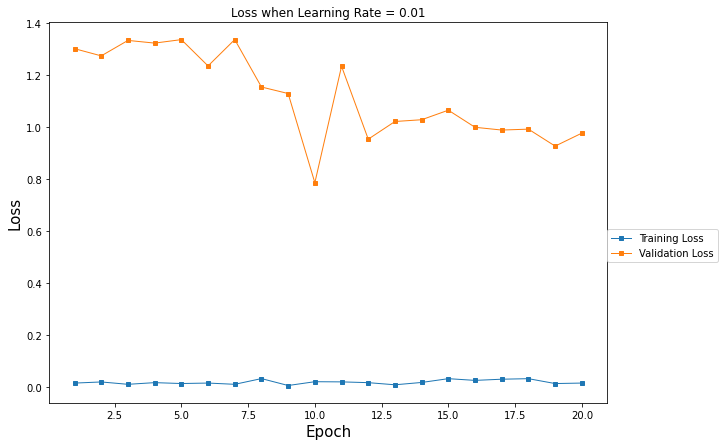

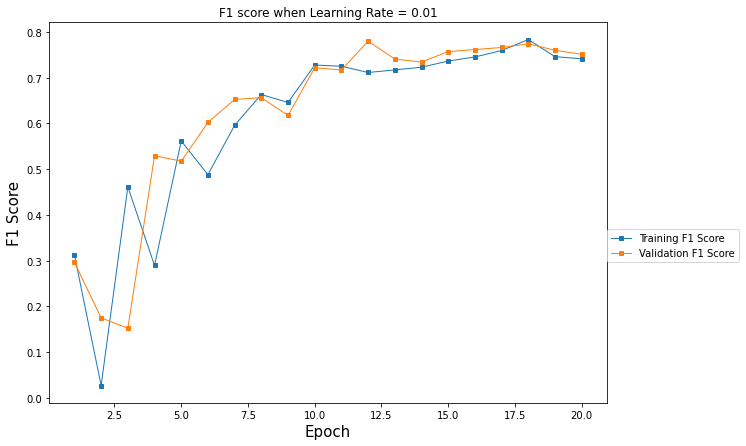

In [39]:
PlotLoss(loss_df,'0.01')
PlotF1(loss_df,'0.01')

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [41]:
def Predict(Model,X):
    test_pred = Model(X)
    res =test_pred.data
    y_pred=torch.max(res,1)[1]
    return y_pred

In [42]:
def PrintReport(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, target_names=['Non-Golgy','Golgy'] ))
  sns.heatmap(cm, annot=True,fmt='g',cmap ='Reds',xticklabels=['Non-Golgy','Golgy'],yticklabels=['Non-Golgy','Golgy'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

              precision    recall  f1-score   support

   Non-Golgy       0.85      0.66      0.74       250
       Golgy       0.53      0.77      0.63       126

    accuracy                           0.69       376
   macro avg       0.69      0.71      0.68       376
weighted avg       0.74      0.69      0.70       376



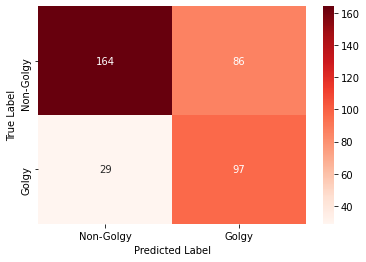

In [43]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

In [44]:
model=Model_VGG_v2()
print(model)
model2,loss_df=Train_v2(50,0.001,1)

Model_VGG_v2(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 512, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.

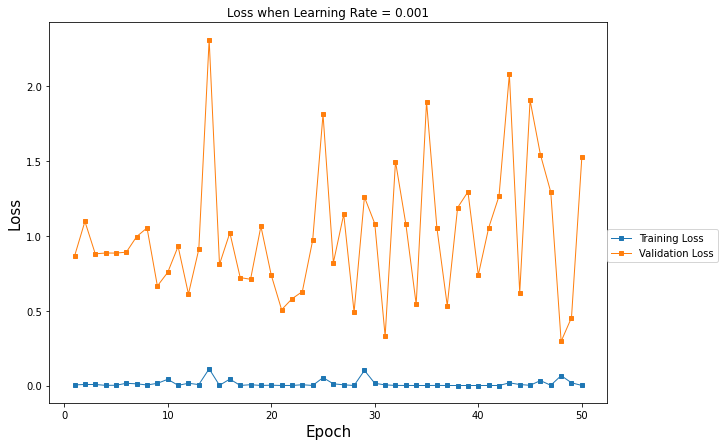

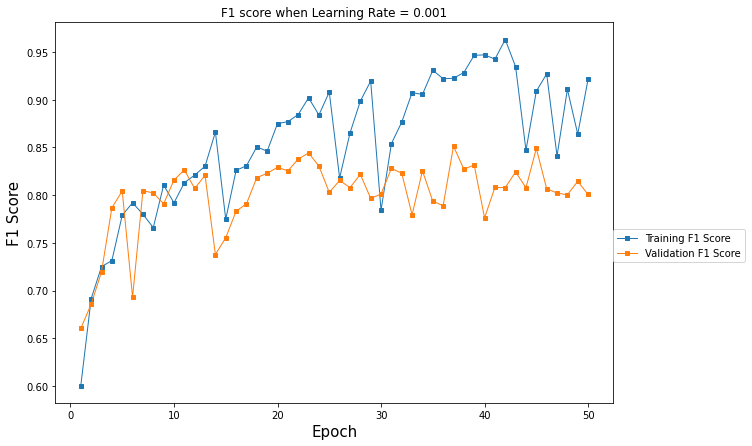

In [45]:
PlotLoss(loss_df,'0.001')
PlotF1(loss_df,'0.001')

              precision    recall  f1-score   support

   Non-Golgy       0.92      0.61      0.73       250
       Golgy       0.54      0.89      0.67       126

    accuracy                           0.70       376
   macro avg       0.73      0.75      0.70       376
weighted avg       0.79      0.70      0.71       376



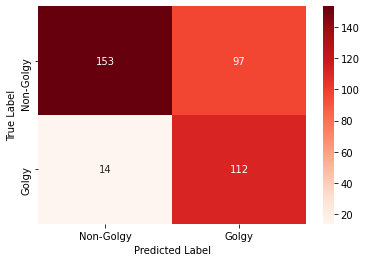

In [46]:
y_pred=Predict(model,torch.tensor(x_test))
PrintReport(y_test,y_pred)

In [47]:
model=Model_VGG_v2()
print(model)
model3,loss_df=Train_v2(200,0.0001,1)

: 2.220570607618852 		 Training F1 Score for Positive Sample: 0.9769959058341863 		 Validation F1 Score for Positive Sample: 0.8154923359901901
Epoch 106 		 Training Loss: 0.0 		 Validation Loss: 0.9801979715173895 		 Training F1 Score for Positive Sample: 0.9843880142204164 		 Validation F1 Score for Positive Sample: 0.7933542319749216
Epoch 107 		 Training Loss: 0.025330623915029125 		 Validation Loss: 1.416947673667561 		 Training F1 Score for Positive Sample: 0.9814936321956189 		 Validation F1 Score for Positive Sample: 0.7898775252525252
Epoch 108 		 Training Loss: 0.08109354972839355 		 Validation Loss: 0.7392964904958551 		 Training F1 Score for Positive Sample: 0.9285252960172228 		 Validation F1 Score for Positive Sample: 0.7954843554443054
Epoch 109 		 Training Loss: 0.01894875737123711 		 Validation Loss: 1.5793869495391846 		 Training F1 Score for Positive Sample: 0.9018660022148395 		 Validation F1 Score for Positive Sample: 0.7887515842839037
Epoch 110 		 Training Loss: 

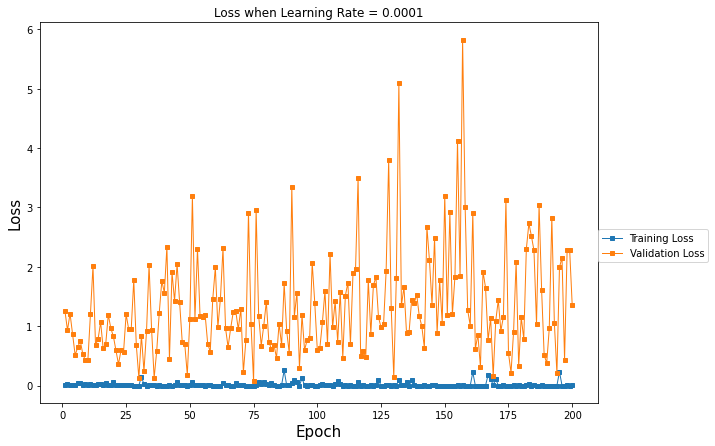

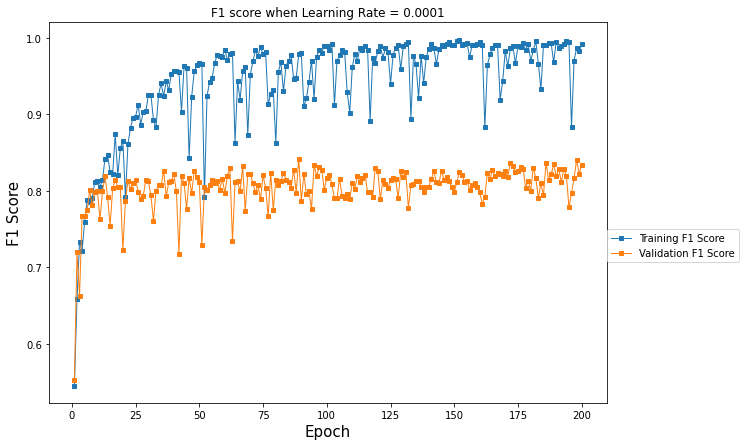

In [48]:
PlotLoss(loss_df,'0.0001')
PlotF1(loss_df,'0.0001')

              precision    recall  f1-score   support

   Non-Golgy       0.80      0.86      0.83       250
       Golgy       0.68      0.56      0.61       126

    accuracy                           0.76       376
   macro avg       0.74      0.71      0.72       376
weighted avg       0.76      0.76      0.76       376



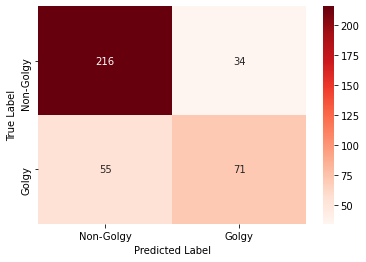

In [49]:
y_pred=Predict(model3,torch.tensor(x_test))
PrintReport(y_test,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.84      0.67      0.74       228
       Golgy       0.68      0.85      0.76       193

    accuracy                           0.75       421
   macro avg       0.76      0.76      0.75       421
weighted avg       0.77      0.75      0.75       421



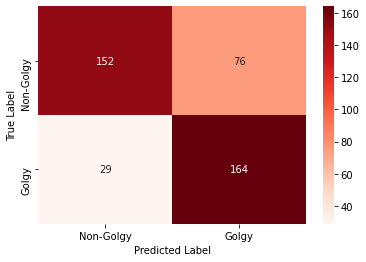

In [50]:
y_pred=Predict(model1,torch.tensor(x_val))
PrintReport(y_val,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.92      0.64      0.75       228
       Golgy       0.68      0.93      0.79       193

    accuracy                           0.77       421
   macro avg       0.80      0.78      0.77       421
weighted avg       0.81      0.77      0.77       421



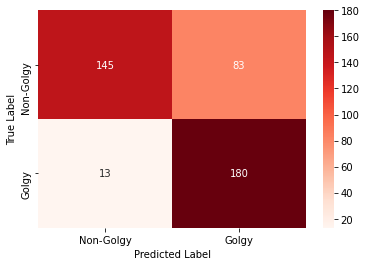

In [51]:
y_pred=Predict(model2,torch.tensor(x_val))
PrintReport(y_val,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.86      0.86      0.86       228
       Golgy       0.84      0.84      0.84       193

    accuracy                           0.85       421
   macro avg       0.85      0.85      0.85       421
weighted avg       0.85      0.85      0.85       421



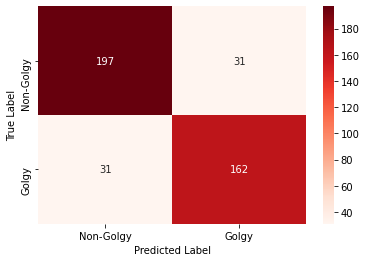

In [52]:
y_pred=Predict(model3,torch.tensor(x_val))
PrintReport(y_val,y_pred)

In [53]:
'''torch.save(model1,'model_6_3_1.pkl')
torch.save(model2,'model_6_3_2.pkl')
torch.save(model3,'model_6_3_3.pkl')'''